In [2]:

from rdflib import Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import statistics
import collections

# RDF graph loading
filename = "cleanedgraph.nt"
rg = Graph()
rg.parse(filename, format='nt')
print("rdflib Graph loaded successfully with {} triples".format(len(rg)))

rdflib Graph loaded successfully with 74233 triples


In [3]:
# Conversion of rdflib.Graph to networkx.Graph
G = rdflib_to_networkx_graph(rg)
print("networkx Graph loaded successfully")

networkx Graph loaded successfully


In [4]:
# Analysis 1

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(G))) #number of nodes with only one link
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(G)))
print()

NETWORK SIZE
The network has 97575 nodes and 74233 edges

PENDANTS
The network has 95656 pendants

DENSITY
The network density is 1.5593885421010617e-05



In [11]:
# Subgraph construction 

query = """
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
SELECT ?s ?p ?o
WHERE {  
    ?s ?p ?o .
    FILTER (
        ?s != <http://edamontology.org/data> &&
        ?o != <http://edamontology.org/data> &&
        ?p != <http://edamontology.org/has_output> &&
        datatype(?o) != xsd:double
    )
}
"""
subg = rg.query(query)
print(len(subg))
sg = rdflib_to_networkx_graph(subg)
print(len(sg))
print("networkx SubGraph loaded successfully")

#        !sameTerm(datatype(?o), xsd:double)
#        datatype(?o) != xsd:decimal
#5243
#10351

#3361
#6681    18.5

3361
6681
networkx SubGraph loaded successfully


In [12]:
# Analysis 2
import heapq

def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

def number_of_pendants(g):
    """
    Equals the number of nodes with degree 1
    """
    pendants = 0
    for u in g:
        if g.degree[u] == 1:
            pendants += 1
    return pendants

# Network size
print("NETWORK SIZE")
print("============")
print("The network has {} nodes and {} edges".format(sg.number_of_nodes(), sg.number_of_edges()))
print()

# Network size
print("PENDANTS")
print("============")
print("The network has {} pendants".format(number_of_pendants(sg))) #number of nodes with only one link
print()

# Density
print("DENSITY")
print("============")
print("The network density is {}".format(nx.density(sg)))
print()

def histogram(l):
    degree_sequence = sorted([d for n, d in list(l.items())], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    print(deg, cnt)
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Histogram")
    plt.ylabel("Count")
    plt.xlabel("Value")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    plt.show()

#filtered_G = nx.Graph()
#for edge in G.edges(data=True):
#    if "http://edamontology.org/data" not in (edge[0], edge[1]):
#        filtered_G.add_edge(edge[0], edge[1], **edge[2])

# Degree centrality -- mean and stdev
dc = nx.degree_centrality(sg)
degrees = []
for k, v in dc.items():
    degrees.append(v)
    
print("DEGREE CENTRALITY") # number of connections a node has
print("=================")
print("The mean degree centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
print("The maximum nodes are {}, with value {}".format(heapq.nlargest(5, dc, key=dc.get), max(dc.values())))
print("The minimum node is {}, with value {}".format(min(dc, key=dc.get), min(dc.values())))
#histogram(dc)
print()

# Eigenvector centrality -- mean and stdev
#ec = nx.eigenvector_centrality(sg)
#degrees = []
#for k,v in ec.items():
#    degrees.append(v)
    
#print("EIGENVECTOR CENTRALITY")
#print("======================")
#print("The mean network eigenvector centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
#print("The maximum node is {}, with value {}".format(max(ec, key=ec.get), max(ec.values())))
#print("The minimum node is {}, with value {}".format(min(ec, key=ec.get), min(ec.values())))
#histogram(ec)
#print()

# Betweenness centrality -- mean and stdev
#bc = nx.betweenness_centrality(sg)   # extent to which a node connects other nodes that are not otherwise connected.
#degrees = []
#for k,v in bc.items():
#    degrees.append(v)

#print("BETWEENNESS CENTRALITY")
#print("======================")
#print("The mean betwenness centrality is {}, with stdev {}".format(mean(degrees), statistics.stdev(degrees)))
##print("The maximum node is {}, with value {}".format(max(bc, key=bc.get), max(bc.values())))
#print("The minimum node is {}, with value {}".format(min(bc, key=bc.get), min(bc.values())))
#histogram(bc)
#print()


# Connected components
cc = list(nx.connected_components(sg))
print("CONNECTED COMPONENTS")
print("====================")
print("The graph has {} connected components".format(len(cc)))
#for i,c in enumerate(cc):
#    print("Connected component {} has {} nodes".format(i,len(c)))
#print()

# Clusters
cl = nx.clustering(sg)
print("CLUSTERS")
print("========")
print("The graph has {} clusters".format(len(cl)))
for i,c in enumerate(cl):
    print("Cluster {} has {} nodes".format(i,len(c)))
#print()
    


NETWORK SIZE
The network has 6681 nodes and 3361 edges

PENDANTS
The network has 6650 pendants

DENSITY
The network density is 0.00015061928231547683

DEGREE CENTRALITY
The mean degree centrality is 0.0001506192823154603, with stdev 1.8566191303866497e-05
The maximum nodes are [rdflib.term.Literal('DOWN'), rdflib.term.Literal('UP'), rdflib.term.Literal('ENST00000521312'), rdflib.term.Literal('ENSG00000271751'), rdflib.term.Literal('ENST00000571311')], with value 0.0011976047904191617
The minimum node is N5de99b6130d64b439e1b09d04f3f5317, with value 0.0001497005988023952

CONNECTED COMPONENTS
The graph has 3320 connected components
CLUSTERS
The graph has 6681 clusters
Cluster 0 has 33 nodes
Cluster 1 has 15 nodes
Cluster 2 has 33 nodes
Cluster 3 has 15 nodes
Cluster 4 has 33 nodes
Cluster 5 has 15 nodes
Cluster 6 has 33 nodes
Cluster 7 has 15 nodes
Cluster 8 has 33 nodes
Cluster 9 has 15 nodes
Cluster 10 has 33 nodes
Cluster 11 has 15 nodes
Cluster 12 has 33 nodes
Cluster 13 has 15 node

Visualizing the graph:


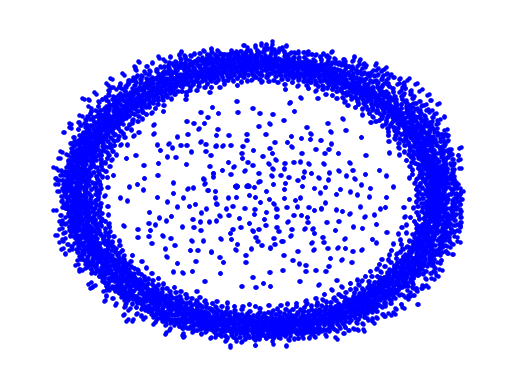

In [16]:
# Plot
print("Visualizing the graph:")
plt.plot()
#nx.draw(sg, with_labels=True, font_weight='bold')
nx.draw(sg, node_size=5, node_color='blue', with_labels=False)